In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/Medical Insurance Cost Forcasting.csv')

In [ ]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

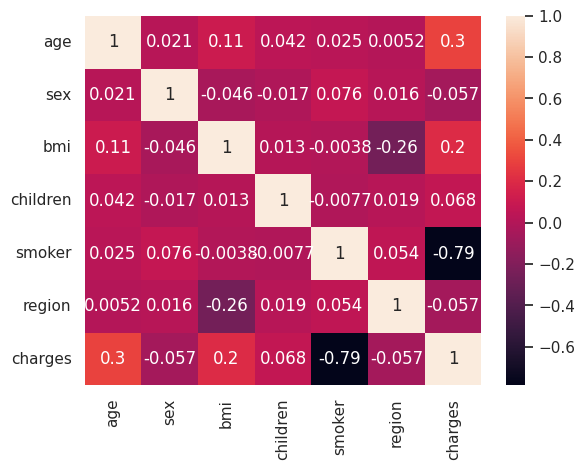

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True,cbar=True)

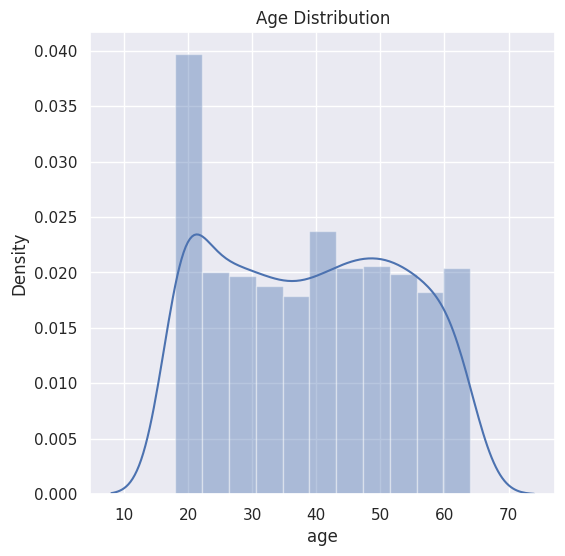

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

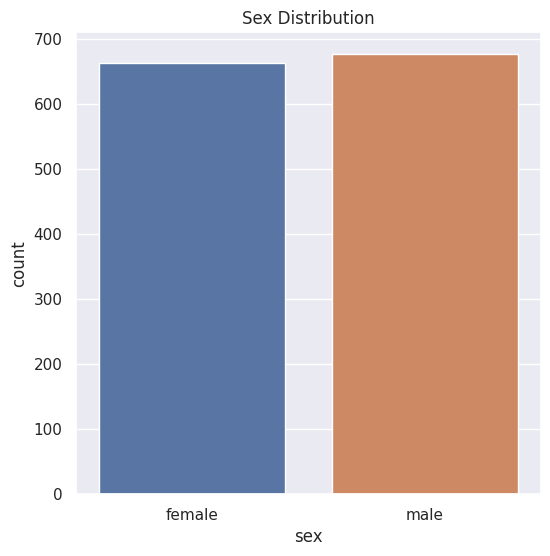

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

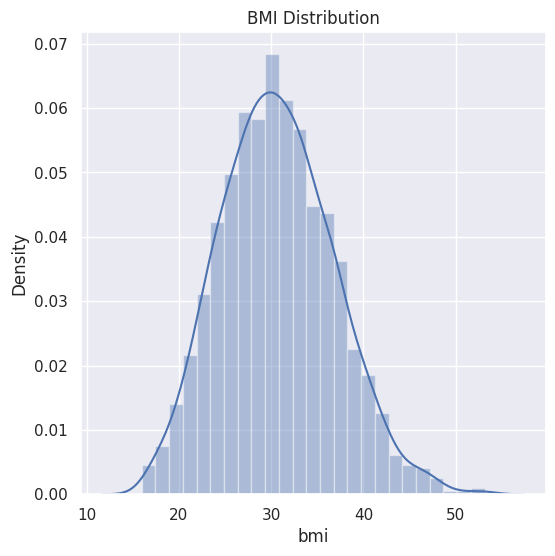

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

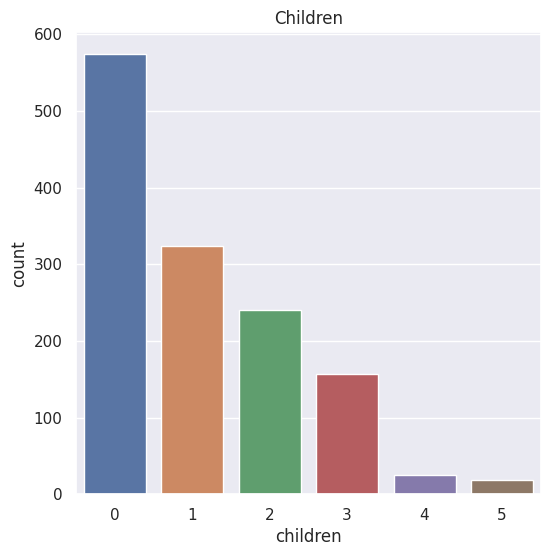

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

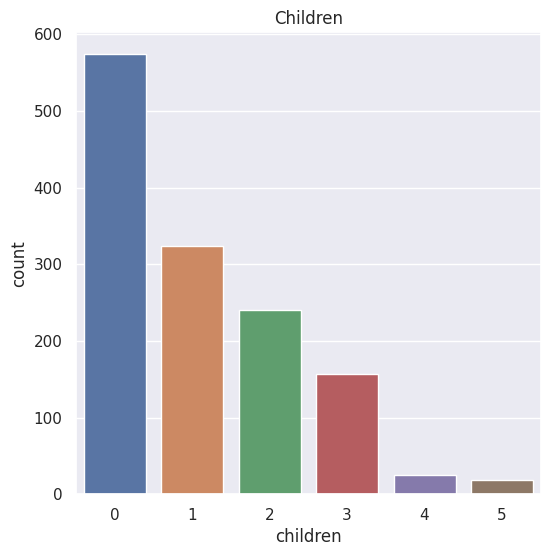

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

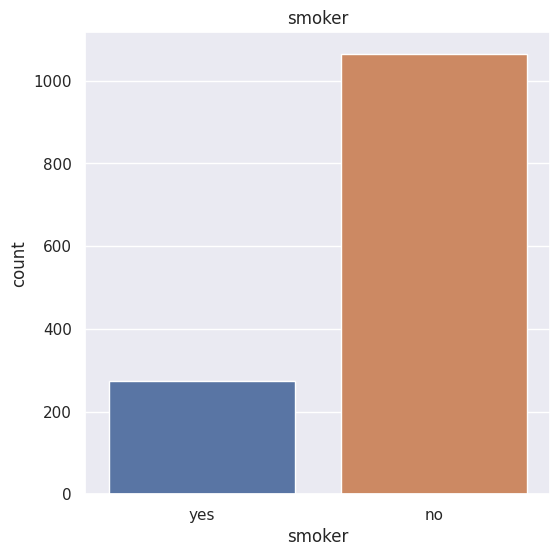

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

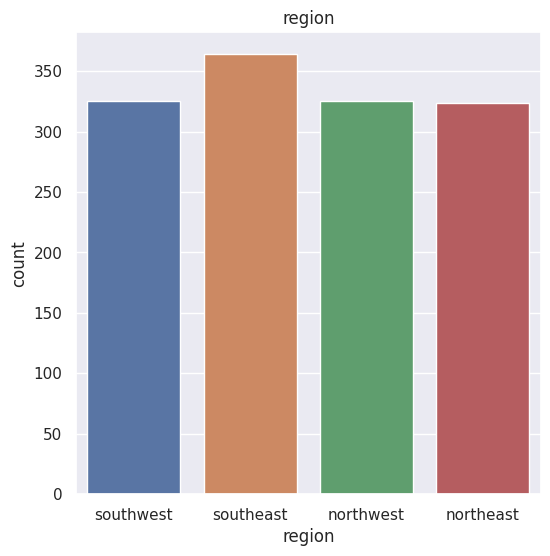

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

<Axes: >

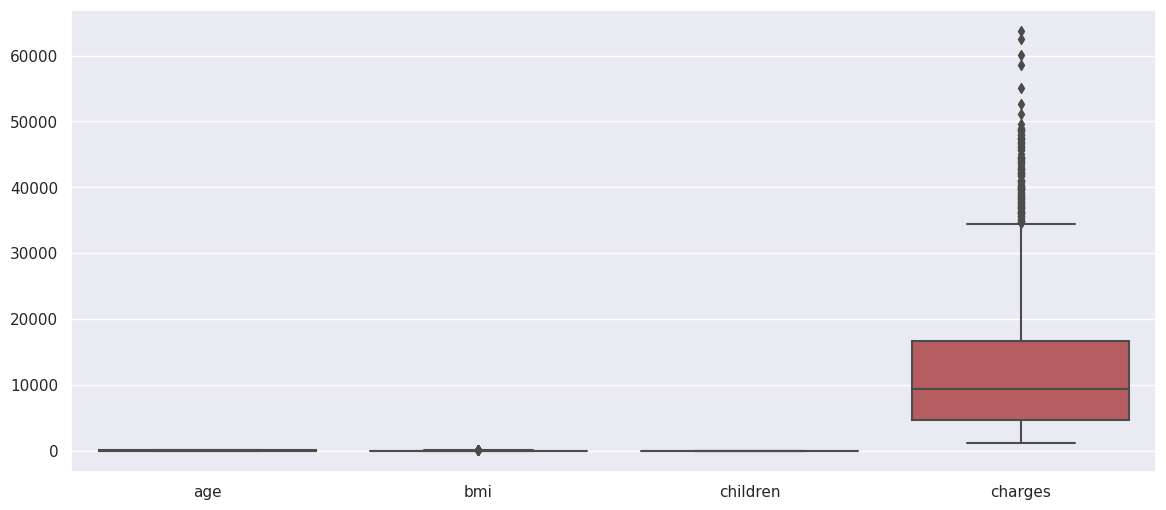

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(df)

ENCODING CATEGORICAL VARIABLE

In [ ]:
# encoding sex
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

SPLIT DATA

In [ ]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


TRAIING MODEL

In [ ]:
# loading the Linear Regression model
LR = LinearRegression()

In [ ]:
LR.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# prediction on training data
Y_pred =LR.predict(X_test)
Y_pred_train=LR.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error

In [ ]:
# R squared value
MLR_R2=r2_score(Y_test,Y_pred)
MLR_R2

0.783021587162344

In [ ]:
r2_score(Y_train,Y_pred_train) #### how well data fit

0.7413131194887537

In [ ]:
MLR_rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE = ',MLR_rmse)         ##   is a statistical measure of the difference between predicted and actual values

RMSE =  5803.931715151758


In [ ]:
MLR_mape=mean_absolute_percentage_error(Y_test,Y_pred)
print('MAPE = ',MLR_mape)

MAPE =  0.4732517846901636


In [ ]:
MLR_mae=mean_absolute_error(Y_test,Y_pred)
print('MAE =',MLR_mae)

MAE = 4190.220190137914


In [ ]:
cols = ['Model', 'R-squared','RMSE','MAPE','MAE']

In [ ]:
result_tabulation = pd.DataFrame(columns = cols)

In [ ]:
OLS_metrics = pd.Series({'Model': "Linear Regression(OLS)",
                 'R-squared' : MLR_R2, 'RMSE' :MLR_rmse, 'MAPE': MLR_mape, 'MAE': MLR_mae})

In [ ]:
result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)

In [ ]:
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.783022,5803.931715,0.473252,4190.22019


SGD LR

In [ ]:
from sklearn.linear_model import SGDRegressor

SGD_model = SGDRegressor(loss="squared_error",alpha = 0.1, max_iter = 1000)

SGD_model.fit(X_train, Y_train)

SGDRegressor(alpha=0.1)

In [ ]:
SGD_y_pred = LR.predict(X_test)
SGD_y_pred_train = LR.predict(X_train)

In [ ]:
SGD_R2=r2_score(Y_test,SGD_y_pred)
SGD_R2

0.783021587162344

In [ ]:
r2_score(Y_train,SGD_y_pred_train)

0.7413131194887537

In [ ]:
SGD_rmse=np.sqrt(mean_squared_error(Y_test,SGD_y_pred))
print('RMSE = ',SGD_rmse)

RMSE =  5803.931715151758


In [ ]:
SGD_mape=mean_absolute_percentage_error(Y_test,SGD_y_pred)
print('MAPE = ',SGD_mape)

MAPE =  0.4732517846901636


In [ ]:
SGD_mae=mean_absolute_error(Y_test,SGD_y_pred)
print('MAE =',SGD_mae)

MAE = 4190.220190137914


In [ ]:
SGD_metrics = pd.Series({'Model': "Linear Regression(SGD)",
                 'R-squared' : SGD_R2, 'RMSE' :SGD_rmse, 'MAPE': SGD_mape, 'MAE': SGD_mae})

In [ ]:
result_tabulation = result_tabulation.append(SGD_metrics , ignore_index = True)
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.783022,5803.931715,0.473252,4190.22019
1,Linear Regression(SGD),0.783022,5803.931715,0.473252,4190.22019


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT_model = DT.fit(X_train,Y_train)
DT_model

DecisionTreeRegressor()

In [ ]:
dt_y_pred = DT_model.predict(X_test)
dt_y_pred_train=DT_model.predict(X_train)

In [ ]:
dt_y_pred

array([ 7518.02535 ,  5469.0066  , 28950.4692  ,  9282.4806  ,
       33732.6867  , 11326.71487 ,  2709.24395 , 14410.9321  ,
        3378.91    , 11015.1747  , 19361.9988  ,  7265.7025  ,
        4040.55825 , 45702.02235 , 48970.2476  , 48885.13561 ,
        8347.1643  , 42760.5022  , 10702.6424  , 21348.706   ,
        3906.127   ,  6849.026   ,  1639.5631  ,  1984.4533  ,
       10493.9458  , 11512.405   , 13228.84695 ,  5312.16985 ,
        9447.25035 , 11774.159275,  7954.517   , 11840.77505 ,
       11482.63485 ,  4906.40965 ,  3490.5491  ,  8733.22925 ,
        2585.269   ,  8522.003   , 24869.8368  , 37742.5757  ,
        4561.1885  ,  2639.0429  , 10713.644   , 12323.936   ,
        5124.1887  , 12925.886   , 26018.95052 ,  3906.127   ,
       40273.6455  ,  4673.3922  , 13887.9685  ,  1720.3537  ,
        6393.60345 ,  1708.0014  , 20781.48892 , 10370.91255 ,
        3070.8087  , 58571.07448 , 10704.47    , 11512.405   ,
       13462.52    ,  4340.4409  , 15170.069   ,  7729.

In [ ]:
DT_R2=r2_score(Y_test,dt_y_pred)
DT_R2

0.711527371273933

In [ ]:
r2_score(Y_train,dt_y_pred_train)

0.9983078124756305

In [ ]:
DT_rmse=np.sqrt(mean_squared_error(Y_test,dt_y_pred))
print('RMSE = ',DT_rmse)

RMSE =  6692.160314862402


In [ ]:
DT_mape=mean_absolute_percentage_error(Y_test,dt_y_pred)
print('MAPE = ',DT_mape)

MAPE =  0.4146103602833821


In [ ]:
DT_mae=mean_absolute_error(Y_test,dt_y_pred)
print('MAE =',DT_mae)

MAE = 3263.684581470149


In [ ]:
tree_max_depth = DT_model.tree_.max_depth
print("Maximum depth of the decision tree:", tree_max_depth)

Maximum depth of the decision tree: 18


In [ ]:
Decision_Tree = pd.Series({'Model': "Decision Tree",
                 'R-squared' : DT_R2, 'RMSE' :DT_rmse, 'MAPE': DT_mape, 'MAE': DT_mae})

In [ ]:
result_tabulation = result_tabulation.append(Decision_Tree , ignore_index = True)

In [ ]:
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.783022,5803.931715,0.473252,4190.220190
1,Linear Regression(SGD),0.783022,5803.931715,0.473252,4190.220190
2,Decision Tree,0.711527,6692.160315,0.414610,3263.684581


HYPER PARA

In [ ]:
from sklearn.model_selection import GridSearchCV
Param = [{"max_depth":range(0,50),"min_samples_split" : [20,10]}]
GS = GridSearchCV(DT_model,Param,cv = 5,scoring='neg_mean_squared_error')

In [ ]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(0, 50),
                          'min_samples_split': [20, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
GS.best_params_

{'max_depth': 4, 'min_samples_split': 20}

In [ ]:
GS.best_score_

-23086033.722275816

In [ ]:
# best_par = {'max_depth': 4, 'min_samples_split': 10}
DT_tun = DecisionTreeRegressor(max_depth= 4,min_samples_split = 10)
DT_tun_mod = DT_tun.fit(X_train,Y_train)

In [ ]:
DT_t_pred =DT_tun_mod.predict(X_test)

In [ ]:
DT_Tunned_R2=r2_score(Y_test,DT_t_pred)
DT_Tunned_R2

0.8641310379678357

In [ ]:
DT_Tunned_RMSE=np.sqrt(mean_squared_error(Y_test,DT_t_pred))
DT_Tunned_RMSE

4592.764309715603

In [ ]:
DT_Tunned_MAPE=mean_absolute_percentage_error(Y_test,DT_t_pred)
DT_Tunned_MAPE

0.3311204332885223

In [ ]:
DT_Tunned_mae=mean_absolute_error(Y_test,DT_t_pred)
DT_Tunned_mae

2697.76543053848

In [ ]:
Decision_Tree_tunned = pd.Series({'Model': "Decision Tree Tunned",
                 'R-squared' : DT_Tunned_R2, 'RMSE' :DT_Tunned_RMSE, 'MAPE': DT_Tunned_MAPE, 'MAE': DT_Tunned_mae})

In [ ]:
result_tabulation = result_tabulation.append(Decision_Tree_tunned , ignore_index = True)

In [ ]:
result_tabulation

,Model,R-squared,RMSE,MAPE,MAE
0,Linear Regression(OLS),0.783022,5803.931715,0.473252,4190.220190
1,Linear Regression(SGD),0.783022,5803.931715,0.473252,4190.220190
2,Decision Tree,0.711527,6692.160315,0.414610,3263.684581
3,Decision Tree Tunned,0.864131,4592.764310,0.331120,2697.765431
